In [9]:
import math 
import sympy as sp
import matplotlib.pyplot as plt
import numpy as np
from IPython.core.interactiveshell import InteractiveShell
from IPython.display import display, Math
InteractiveShell.ast_node_interactivity = 'all'
from sympy.abc import beta
from scipy.optimize import curve_fit

In [22]:
data = np.empty(5, dtype=object)
xdata = np.empty(5, dtype=object)
ydata = np.empty(5, dtype=object)

for i in range(1,6):
    data[i-1] = np.genfromtxt("1275vrun{0}.csv".format(i), delimiter=',', skip_header = 0) ### PULLS IN CSV FILE
    xdata[i-1] = data[i-1][:,0:1]  ### EXTRACT CSV INTO NUMPY ARRAYS
    ydata[i-1] = data[i-1][:,1:]
    xdata[i-1] = np.reshape(xdata[i-1], xdata[i-1].size)
    ydata[i-1] = np.reshape(ydata[i-1], ydata[i-1].size)

In [43]:
ydata[:].size

5

In [74]:
Ieavg = []
Iesigma = []
for i in range(ydata[0].size):
    Y = 0
    for j in range(ydata[:].size):
        Y += ydata[j][i]+abs(min(ydata[j]))
    Ieavg.append(Y/ydata[:].size)
    s = 0
    for j in range(ydata[:].size):
        s += (ydata[j][i]+abs(min(ydata[j])) - yavg[i])**2
    Iesigma.append(np.sqrt(s/ydata[:].size))
Iesigma = np.array(Iesigma)

In [77]:
logIeavg = []
logIesigma = []
for i in range(ydata[0].size):
    Y = 0
    for j in range(ydata[:].size):
        Y += np.log(ydata[j][i]+abs(min(ydata[j])))
    logIeavg.append(Y/ydata[:].size)
    s = 0
    for j in range(ydata[:].size):
        s += (ydata[j][i]+abs(min(ydata[j])) - yavg[i])**2
    logIesigma.append(np.sqrt(s/ydata[:].size))
logIesigma = np.array(logIesigma)

/tmp/ipykernel_5613/2076387596.py:6: RuntimeWarning: divide by zero encountered in log
  Y += np.log(ydata[j][i]+abs(min(ydata[j])))


<ErrorbarContainer object of 3 artists>

<ErrorbarContainer object of 3 artists>

Text(0.15, 0.85, 'Error bars multiplied X1E4')

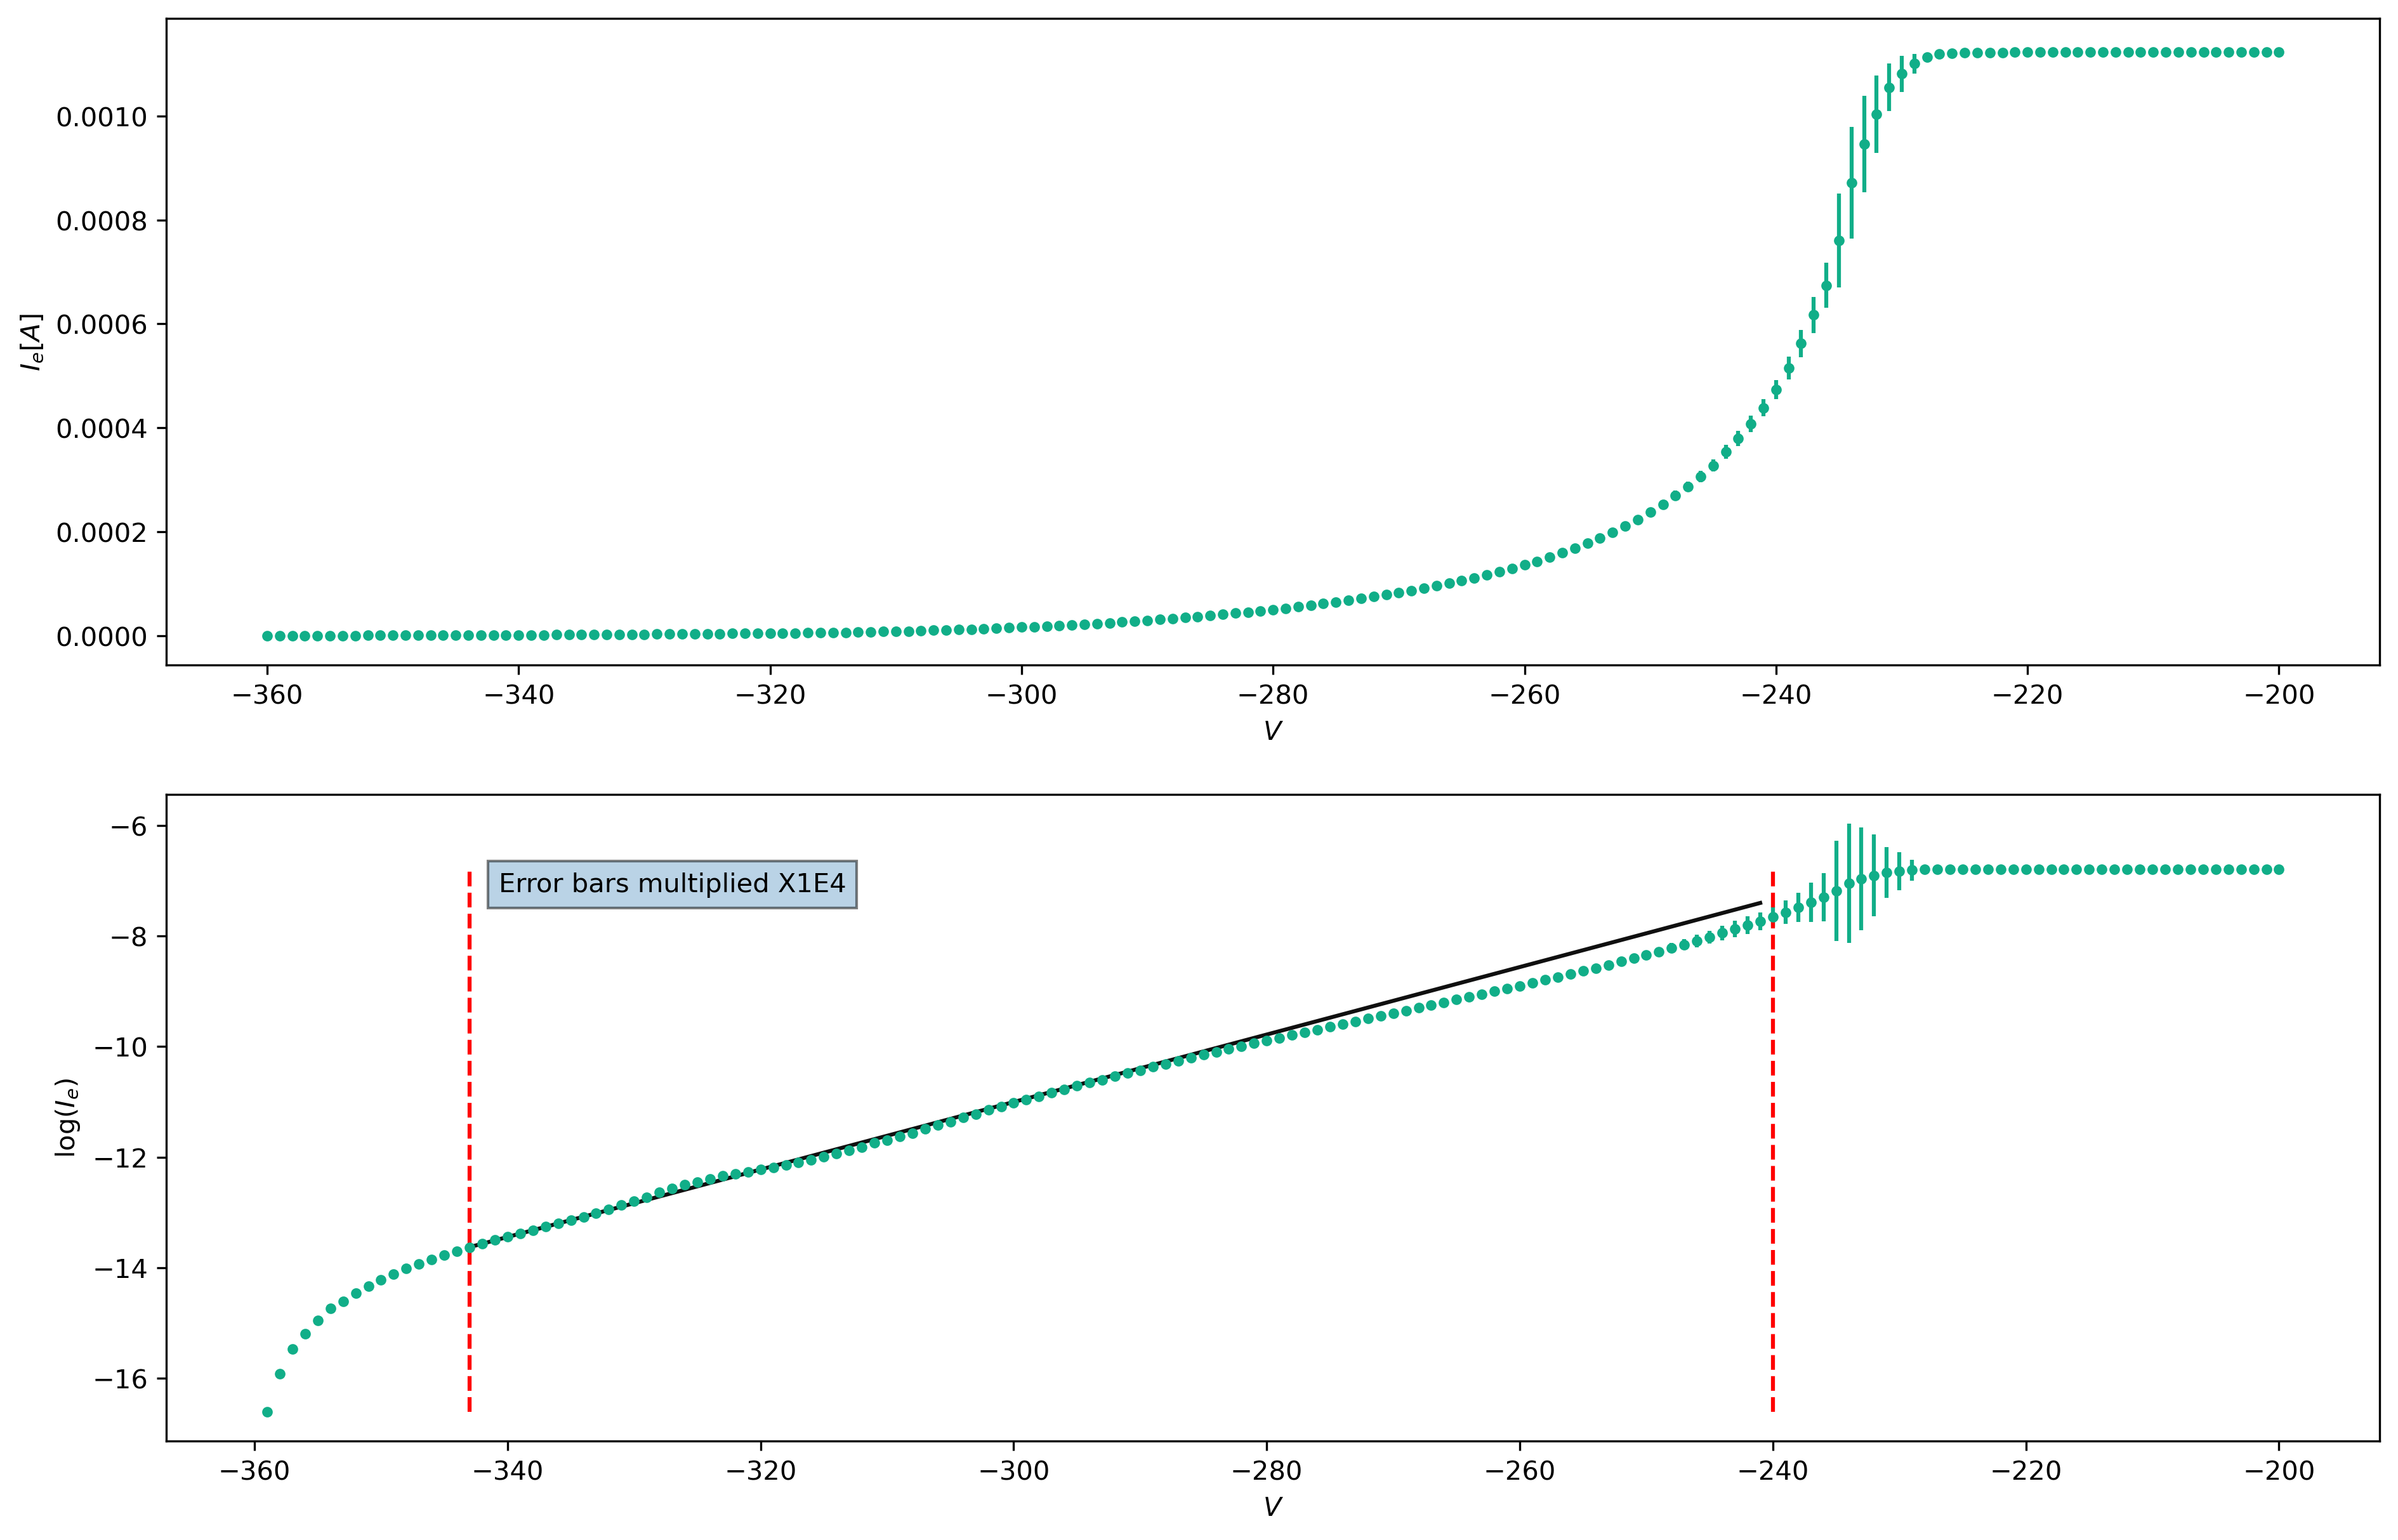

In [108]:
fig = plt.figure(figsize=(15,15), dpi=300)
ax0 = fig.add_subplot(3, 1, 1, xlabel='$V$', ylabel='$I_e [A]$')
ax0.errorbar(xdata[0], Ieavg, yerr = Iesigma, linestyle='none', marker='.', color='#11ae88')### PLOT OF DATA
ax1 = fig.add_subplot(3, 1, 2, xlabel='$V$', ylabel='$\log(I_e)$')
ax1.errorbar(xdata[0], logIeavg, yerr = logIesigma*1e4, linestyle='none', marker='.', color='#11ae88')### PLOT OF DATA
plt.text(.15,.85, 'Error bars multiplied X1E4', transform=ax1.transAxes, bbox=dict(facecolor='#76a8ce', alpha=0.5))

start, end = 17, 120

def func(x,m,b): return m*x+b
popt, pcov = curve_fit(func, xdata[0][start:end], logIeavg[start:end], sigma=logIesigma[start:end])
ax1.plot(xdata[0][start:end], func(xdata[0][start:end], *popt), color='#101010') 

ax1.vlines(xdata[0][start], min(logIeavg[1:]), max(logIeavg[1:]), colors="red", linestyles='dashed') ### PLOT OF VLINES
ax1.vlines(xdata[0][end], min(logIeavg[1:]), max(logIeavg[1:]), colors="red", linestyles='dashed') ### PLOT OF VLINES


In [116]:
k = 1.380649e-23
e = 1.602176634e-19
Te = (e/k)*(popt[0]**-1)
Te

190186.5432078025

array([0.0610165 , 7.30071085])